In [3]:
import numpy as np 
import pandas as pd 
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

### modules

In [4]:
#boxPlot
def boxPlot(dim1, dim2, label):
    fig_dims = (dim1, dim2)
    fig, ax = plt.subplots(figsize=fig_dims)
    sns.countplot(x=label,data=glDF)

In [5]:
# plotting a pie chart
def pieChart(labels, counts):    
    sizes = [counts[var_cat] for var_cat in labels]
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
    ax1.axis('equal')
    plt.show()

### loading data from csv

In [6]:
#read all files
all_files = glob.glob("JET_CSV_DATA/*.csv")

li = []

for filename in all_files:
    glDF = pd.read_csv(filename, index_col=None, header=0)
    li.append(glDF)

glDF = pd.concat(li, axis=0, ignore_index=True)
glDF.head(5)



C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DTT_ID,GL account,Business Unit,Journal,VERS,LDG_NAME,Account No,Period,Sequence No,Post Date,...,DOC_XREF,USER_FLD1,BAT_CRUSER,BAT_CRTERM,SOURCE_ID,Source_Date,SOURCE_TIMEI,SOURCE_USER,POST_USER,DOC_UNIQUE_ID
0,611102,GL account 197,Business Unit 51,Journal 1,VERS 2,LDG_NAME 1,Account No 28386,Period 12,1044.0,3/07/2015,...,DOC_XREF 2312918,NaN,BAT_CRUSER 60,BAT_CRTERM 5,SOURCE_ID 4,2/07/2015,232352.0,SOURCE_USER 61,POST_USER 60,6a39f98d98784be3a6de803b02708e5e
1,611162,GL account 197,Business Unit 51,Journal 1,VERS 2,LDG_NAME 1,Account No 28386,Period 12,1045.0,3/07/2015,...,DOC_XREF 2312919,NaN,BAT_CRUSER 60,BAT_CRTERM 5,SOURCE_ID 7,3/07/2015,21446.0,SOURCE_USER 61,POST_USER 60,NaN
2,611197,GL account 197,Business Unit 51,Journal 1,VERS 2,LDG_NAME 1,Account No 28386,Period 12,934.0,2/07/2015,...,DOC_XREF 2301257,NaN,BAT_CRUSER 60,BAT_CRTERM 5,SOURCE_ID 4,1/07/2015,231358.0,SOURCE_USER 61,POST_USER 60,1aa32ff8a72c4394b2e50f44fa8b12f1
3,611198,GL account 197,Business Unit 51,Journal 1,VERS 2,LDG_NAME 1,Account No 28386,Period 12,935.0,2/07/2015,...,DOC_XREF 2301257,NaN,BAT_CRUSER 60,BAT_CRTERM 5,SOURCE_ID 4,1/07/2015,231358.0,SOURCE_USER 61,POST_USER 60,1aa32ff8a72c4394b2e50f44fa8b12f1
4,611199,GL account 197,Business Unit 51,Journal 1,VERS 2,LDG_NAME 1,Account No 28386,Period 12,936.0,2/07/2015,...,DOC_XREF 2301258,NaN,BAT_CRUSER 60,BAT_CRTERM 5,SOURCE_ID 7,2/07/2015,12710.0,SOURCE_USER 61,POST_USER 60,NaN


In [7]:
glDF.shape


(10627609, 31)

In [8]:
glDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10627609 entries, 0 to 10627608
Data columns (total 31 columns):
DTT_ID           object
GL account       object
Business Unit    object
Journal          object
VERS             object
LDG_NAME         object
Account No       object
Period           object
Sequence No      float64
Post Date        object
PTIMEI           float64
JNL_LNE          float64
DOC_TYPE         object
Doc Date         object
DOC_REF1         object
SOURCE           object
Amount           float64
NARR1            float64
BAT_NAME         object
BAT CR DATE      object
BAT_CRTIMEI      float64
DOC_XREF         object
USER_FLD1        object
BAT_CRUSER       object
BAT_CRTERM       object
SOURCE_ID        object
Source_Date      object
SOURCE_TIMEI     float64
SOURCE_USER      object
POST_USER        object
DOC_UNIQUE_ID    object
dtypes: float64(7), object(24)
memory usage: 2.5+ GB


# cleaning data

In [9]:
#delete columns not required - some are redundant or not required 
glDF.drop(['DTT_ID', 'BAT CR DATE', 'BAT_CRTIMEI', 'Doc Date', 'Post Date', 'PTIMEI', 'DOC_XREF', 'USER_FLD1', 'USER_FLD1', \
                 'VERS', 'Source_Date', 'SOURCE_TIMEI', 'Sequence No', 'DOC_UNIQUE_ID' ], axis=1, inplace=True)



In [10]:
glDF.isnull().any()

GL account       True
Business Unit    True
Journal          True
LDG_NAME         True
Account No       True
Period           True
JNL_LNE          True
DOC_TYPE         True
DOC_REF1         True
SOURCE           True
Amount           True
NARR1            True
BAT_NAME         True
BAT_CRUSER       True
BAT_CRTERM       True
SOURCE_ID        True
SOURCE_USER      True
POST_USER        True
dtype: bool

In [11]:
# delete rows and columns which has all null values
glDF.dropna(how='all', axis=1, inplace=True)
glDF.dropna(how='all', inplace=True)

#fill columns with null values
glDF.isnull().any()

#fill null value with mode
glDF.fillna(glDF.mode().iloc[0], inplace=True)

In [12]:
glDF.isnull().any()

GL account       False
Business Unit    False
Journal          False
LDG_NAME         False
Account No       False
Period           False
JNL_LNE          False
DOC_TYPE         False
DOC_REF1         False
SOURCE           False
Amount           False
BAT_NAME         False
BAT_CRUSER       False
BAT_CRTERM       False
SOURCE_ID        False
SOURCE_USER      False
POST_USER        False
dtype: bool

# Understanding Categorical data 

In [63]:
#Journal
glDF['Journal'].value_counts()

Journal 1    9079473
Journal 2    1548116
Name: Journal, dtype: int64

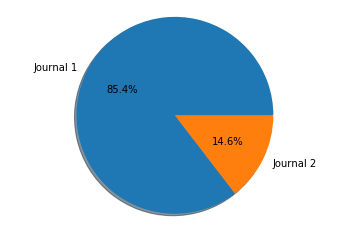

In [17]:
labels = glDF['Journal'].astype('category').cat.categories.tolist()
counts = glDF['Journal'].value_counts()
pieChart(labels, counts)

In [14]:
#period
glDF['Period'].value_counts()

Period 4     933197
Period 1     931023
Period 9     925210
Period 12    910630
Period 3     909240
Period 6     894587
Period 11    894362
Period 2     881191
Period 5     864568
Period 10    857502
Period 8     848074
Period 7     737923
Period 13     40082
Name: Period, dtype: int64

In [74]:
glDF['Period'].unique()

[Period 12, 1, 10, Period 11, 3, ..., 2, 5, 6, 7, Period 13]
Length: 13
Categories (13, object): [Period 12, 1, 10, Period 11, ..., 5, 6, 7, Period 13]

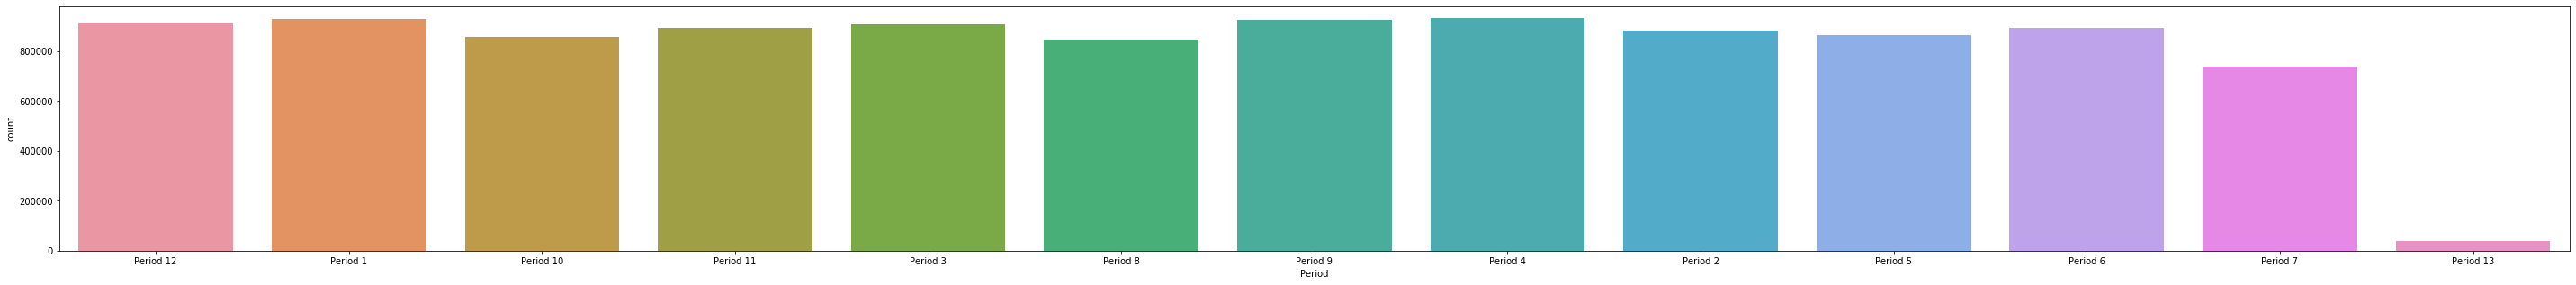

In [15]:
boxPlot(50,5,'Period')

In [ ]:
#hot encoing for Journal column
glDF = pd.get_dummies(glDF, columns=['Journal'])

glDF.drop(['Journal'],axis=1, inplace=True)


In [18]:
# change values to numerical so that columns can be converted to categories

cleanup_nums = {"SOURCE_ID": {"SOURCE 2": 2, "SOURCE 3": 3, "SOURCE 4": 4, "SOURCE 5": 5, "SOURCE 6": 6,
                                  "SOURCE 7":7, "SOURCE 8": 8},
                "Period": {"Period 1": 1, "Period 2": 2, "Period 3": 3, "Period 4": 4, "Period 5": 5, "Period 6": 6,
                                  "Period 7":7, "Period 8": 8, "Period 9":9, "Period 10":10 },
                "LDG_NAME": {"LDG_NAME 1": 1}
               }

glDF.replace(cleanup_nums, inplace=True)

glDF["SOURCE_ID"] = glDF["SOURCE_ID"].astype('category')
glDF["Period"] = glDF["Period"].astype('category')
glDF["LDG_NAME"] = glDF["LDG_NAME"].astype('category')
glDF["LDG_NAME"] = glDF["LDG_NAME"].astype('category')
glDF["SOURCE_USER"] = glDF["SOURCE_USER"].astype('category')
glDF["POST_USER"] = glDF["POST_USER"].astype('category')


In [19]:
glDF.dtypes

GL account         object
Business Unit      object
Journal            object
LDG_NAME         category
Account No         object
Period           category
JNL_LNE           float64
DOC_TYPE           object
DOC_REF1           object
SOURCE             object
Amount            float64
BAT_NAME           object
BAT_CRUSER         object
BAT_CRTERM         object
SOURCE_ID        category
SOURCE_USER      category
POST_USER        category
dtype: object

In [54]:
# source user
glDF['SOURCE_USER'].value_counts()

array(['SOURCE_USER 61', 'SOURCE_USER 32', 'SOURCE_USER 81',
       'SOURCE_USER 136', 'SOURCE_USER 86', 'SOURCE_USER 21',
       'SOURCE_USER 150', 'SOURCE_USER 83', 'SOURCE_USER 44',
       'SOURCE_USER 65', 'SOURCE_USER 30', 'SOURCE_USER 111',
       'SOURCE_USER 76', 'SOURCE_USER 119', 'SOURCE_USER 3',
       'SOURCE_USER 70', 'SOURCE_USER 145', 'SOURCE_USER 71',
       'SOURCE_USER 108', 'SOURCE_USER 31', 'SOURCE_USER 120',
       'SOURCE_USER 82', 'SOURCE_USER 67', 'SOURCE_USER 146',
       'SOURCE_USER 95', 'SOURCE_USER 101', 'SOURCE_USER 77',
       'SOURCE_USER 100', 'SOURCE_USER 6', 'SOURCE_USER 69',
       'SOURCE_USER 115', 'SOURCE_USER 5', 'SOURCE_USER 107',
       'SOURCE_USER 54', 'SOURCE_USER 72', 'SOURCE_USER 127',
       'SOURCE_USER 2', 'SOURCE_USER 129', 'SOURCE_USER 98',
       'SOURCE_USER 124', 'SOURCE_USER 113', 'SOURCE_USER 135',
       'SOURCE_USER 46', 'SOURCE_USER 75', 'SOURCE_USER 106',
       'SOURCE_USER 48', 'SOURCE_USER 78', 'SOURCE_USER 50',
       'SO

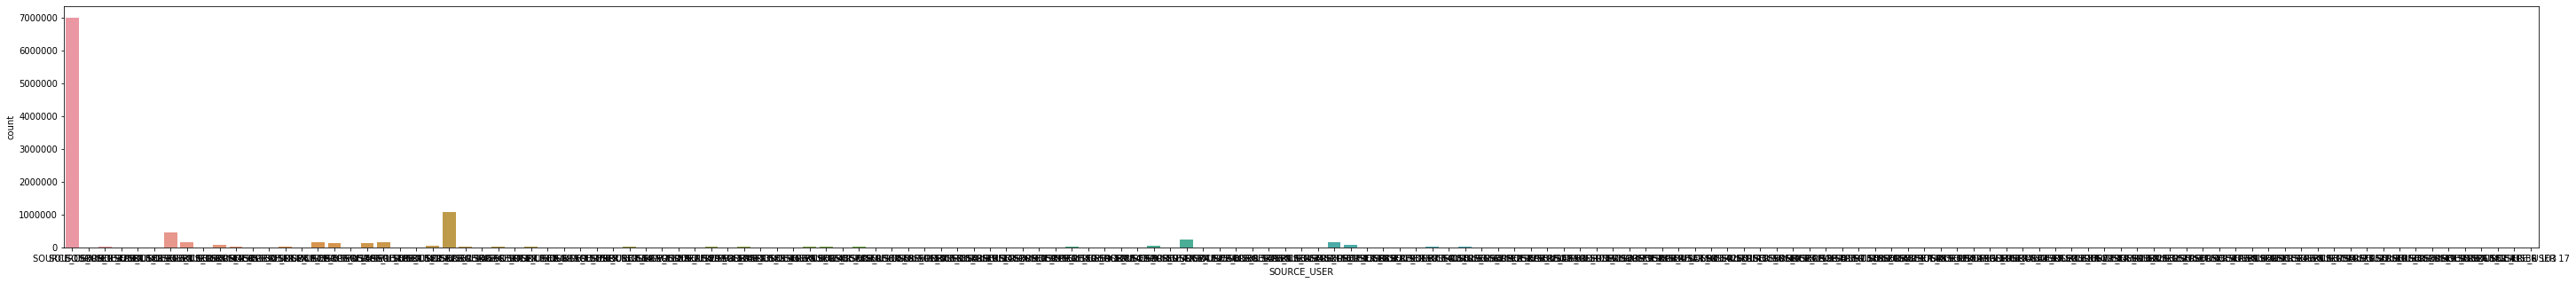

In [32]:
fig_dims = (50, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='SOURCE_USER',data=df)

In [52]:
#Post user
df['POST_USER'].value_counts().count()


array(['POST_USER 60', 'POST_USER 31', 'POST_USER 80', 'POST_USER 135',
       'POST_USER 85', 'POST_USER 20', 'POST_USER 149', 'POST_USER 82',
       'POST_USER 43', 'POST_USER 64', 'POST_USER 29', 'POST_USER 110',
       'POST_USER 75', 'POST_USER 118', 'POST_USER 2', 'POST_USER 69',
       'POST_USER 144', 'POST_USER 70', 'POST_USER 107', 'POST_USER 30',
       'POST_USER 119', 'POST_USER 81', 'POST_USER 66', 'POST_USER 145',
       'POST_USER 94', 'POST_USER 100', 'POST_USER 73', 'POST_USER 99',
       'POST_USER 5', 'POST_USER 68', 'POST_USER 114', 'POST_USER 4',
       'POST_USER 106', 'POST_USER 53', 'POST_USER 71', 'POST_USER 126',
       'POST_USER 1', 'POST_USER 128', 'POST_USER 97', 'POST_USER 123',
       'POST_USER 112', 'POST_USER 76', 'POST_USER 134', 'POST_USER 45',
       'POST_USER 74', 'POST_USER 105', 'POST_USER 47', 'POST_USER 77',
       'POST_USER 49', 'POST_USER 109', 'POST_USER 54', 'POST_USER 108',
       'POST_USER 129', 'POST_USER 137', 'POST_USER 142', 'POS

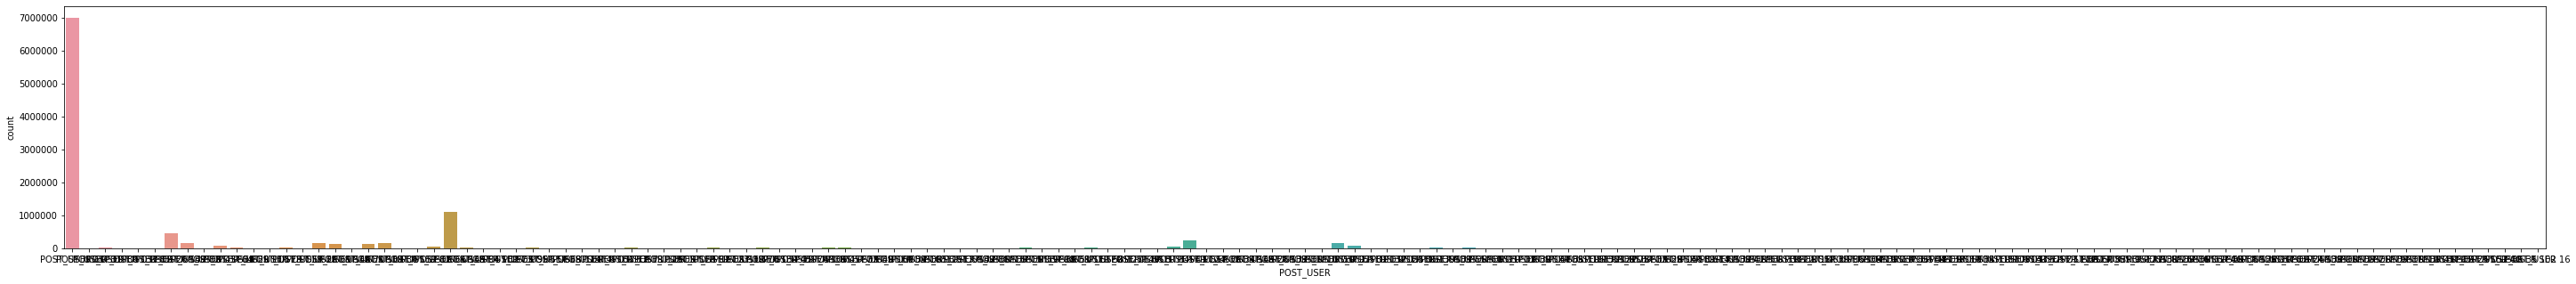

In [33]:
fig_dims = (50, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='POST_USER',data=df)

In [37]:
#counting records per Post User
df_PostUser = glDF.groupby('POST_USER')['GL account'].count()
df_PostUser

POST_USER
POST_USER 1       8994
POST_USER 10      3131
POST_USER 100     4715
POST_USER 101    14296
POST_USER 102        5
                 ...  
POST_USER 95       520
POST_USER 96       707
POST_USER 97      2100
POST_USER 98      9837
POST_USER 99      8564
Name: GL account, Length: 151, dtype: int64

In [29]:
column_names = ["POST_USER", "COUNT"]

df= pd.DataFrame(columns = column_names)

df = df_PostUser.to_frame()

In [65]:
df.where(df[0:] < 10, inplace=True)
df.dropna(how="any", inplace=True)

In [64]:
#finding POST users which has posted less than 10 records 
df

,GL account
POST_USER,
POST_USER 102,5.0
POST_USER 12,8.0
POST_USER 16,5.0
POST_USER 37,4.0
POST_USER 40,5.0


In [10]:
#checking GL account
glDF['GL account'].value_counts()

GL account 197    164958
GL account 779    141283
GL account 629     65392
GL account 539     47222
GL account 205     46823
                   ...  
GL account 480         1
GL account 713         1
GL account 815         1
GL account 414         1
GL account 167         1
Name: GL account, Length: 612, dtype: int64

In [56]:
#checking net amount for each journal entry
glDF['BAT_NAME'].value_counts()

BAT_NAME 218879    10863
BAT_NAME 386690     6468
BAT_NAME 159088     6266
BAT_NAME 409828     5798
BAT_NAME 494310     5706
                   ...  
BAT_NAME 743336        2
BAT_NAME 696287        2
BAT_NAME 710816        2
BAT_NAME 93540         1
BAT_NAME 82034         1
Name: BAT_NAME, Length: 81664, dtype: int64

In [73]:
glDF["Amount"].describe()

count    1.062759e+07
mean     8.986036e-03
std      7.245446e+03
min     -5.521651e+06
25%     -6.240780e-01
50%      4.711447e-02
75%      8.650681e-01
max      5.521651e+06
Name: Amount, dtype: float64

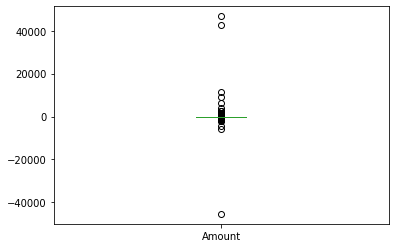

In [72]:
# check total net amount for each Batch name 
glDF.groupby("BAT_NAME")["Amount"].sum().plot.box()